#**Introduction to ComputerVision**
##*Convolution Neural Network*(basics)



           

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.datasets import cifar10
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.callbacks import TensorBoard

Using TensorFlow backend.


###Loading data from Cifar10 datasets

In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
print("shape of x_train :"+str(x_train.shape))
print("shape of x_train :"+str(x_test.shape))
print("shape of y_train :"+str(y_train.shape))
print("shape of y_test  :"+str(y_test.shape))

shape of x_train :(50000, 32, 32, 3)
shape of x_train :(10000, 32, 32, 3)
shape of y_train :(50000, 1)
shape of y_test  :(10000, 1)


###data Visualization

[9]


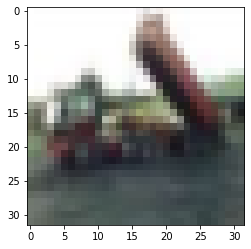

In [0]:
x_train[2]
print(y_train[2])
plt.imshow(x_train[2])

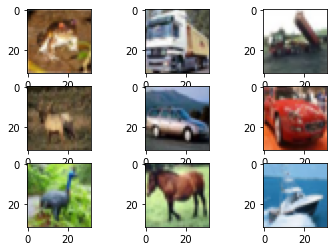

In [0]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()  

In [0]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

###Building layers of neural network


In [0]:
 model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=x_train.shape[1:]),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10,activation='softmax')
    ])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4480 - accuracy: 0.4807
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0402 - accuracy: 0.6378
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8822 - accuracy: 0.6944
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7823 - accuracy: 0.7310
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7073 - accuracy: 0.7542
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6448 - accuracy: 0.7771
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5891 - accuracy: 0.7953
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5504 - accuracy: 0.8088
Epoch 9/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5107 - accuracy: 0.8223
Epoch 10/10
1563/1563 [==============================] - 73s 47m

###We got an train accuracy of 83.5%

In [0]:
 evaluation=model.evaluate(x_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.8387 - accuracy: 0.7397
Test Accuracy: 0.7397000193595886


###Test accuracy of 73.9%

In [0]:
predicted_classes=model.predict_classes(x_test)
predicted_classes
y_test=y_test.argmax(1)

###Predicted classes

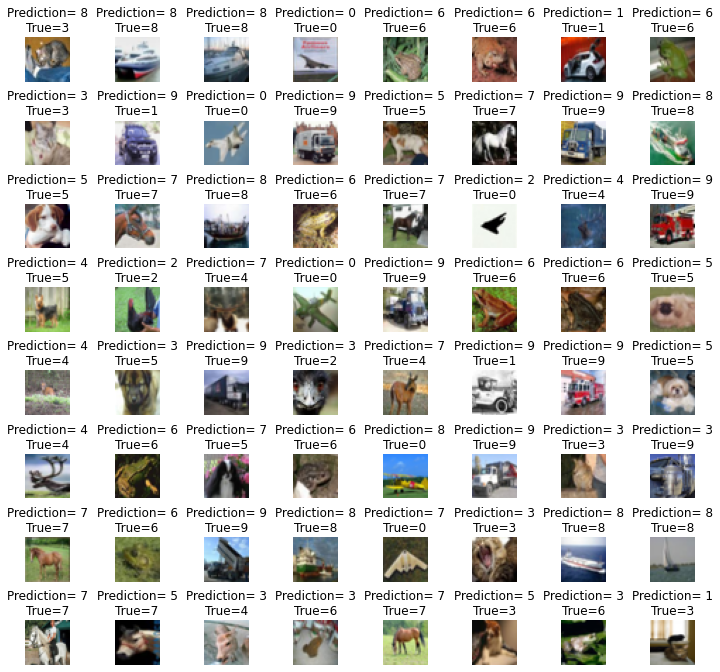

In [0]:

L=8
W=8
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


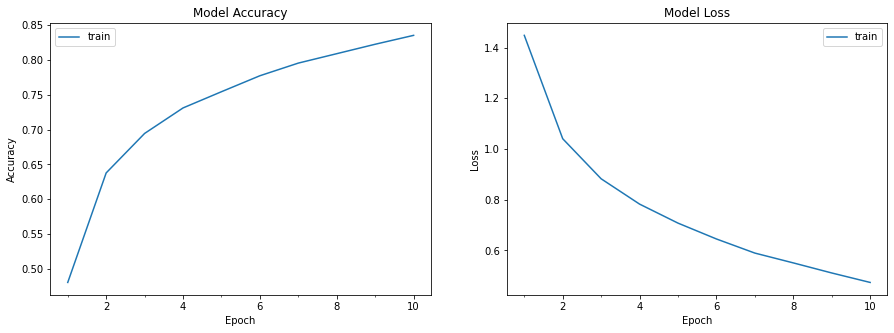

In [0]:
def plotmodelhistory(modelhistory, acc='accuracy'): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    axs[0].plot(range(1,len(modelhistory.history[acc])+1),modelhistory.history[acc]) 
    #axs[0].plot(range(1,len(modelhistory.history[valacc])+1),modelhistory.history[valacc]) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(modelhistory.history[acc])+1),len(modelhistory.history[acc])/10) 
    axs[0].legend(['train', 'val'], loc='best') 
    axs[1].plot(range(1,len(modelhistory.history['loss'])+1),modelhistory.history['loss']) 
   # axs[1].plot(range(1,len(modelhistory.history['val_loss'])+1),modelhistory.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(modelhistory.history['loss'])+1),len(modelhistory.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plotmodelhistory(history)